In [1]:
import sys
import os
from math import log
import numpy as np
import scipy as sp
from PIL import Image
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

In [2]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

In [3]:
path_root = 'malimg_data' 

In [4]:
batches = ImageDataGenerator().flow_from_directory(directory=path_root, target_size=(128,128), batch_size=10000)

Found 9339 images belonging to 25 classes.


In [5]:
batches.class_indices

{'Adialer.C': 0,
 'Agent.FYI': 1,
 'Allaple.A': 2,
 'Allaple.L': 3,
 'Alueron.gen!J': 4,
 'Autorun.K': 5,
 'C2LOP.P': 6,
 'C2LOP.gen!g': 7,
 'Dialplatform.B': 8,
 'Dontovo.A': 9,
 'Fakerean': 10,
 'Instantaccess': 11,
 'Lolyda.AA1': 12,
 'Lolyda.AA2': 13,
 'Lolyda.AA3': 14,
 'Lolyda.AT': 15,
 'Malex.gen!J': 16,
 'Obfuscator.AD': 17,
 'Rbot!gen': 18,
 'Skintrim.N': 19,
 'Swizzor.gen!E': 20,
 'Swizzor.gen!I': 21,
 'VB.AT': 22,
 'Wintrim.BX': 23,
 'Yuner.A': 24}

In [6]:
ds, labels = next(batches)

In [7]:
ds.shape

(9339, 128, 128, 3)

In [8]:
labels.shape

(9339, 25)

In [9]:
classes = batches.class_indices.keys()

In [10]:
perc = (sum(labels)/labels.shape[0])*100

<BarContainer object of 25 artists>

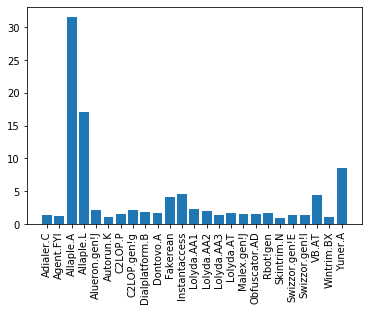

In [11]:
plt.xticks(rotation='vertical')
plt.bar(classes,perc)

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(ds/255.,labels, test_size=0.3)

In [13]:
X_train.shape

(6537, 128, 128, 3)

In [14]:
X_test.shape

(2802, 128, 128, 3)

In [15]:
model = Sequential()



model.add(Conv2D(32,kernel_size = (3,3),padding = 'valid',activation = 'relu',input_shape = (128,128,3)))
model.add(MaxPooling2D(pool_size = (2,2),strides = 2, padding = 'valid'))

model.add(Conv2D(32,kernel_size = (3,3),padding = 'valid',activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2),strides = 2, padding = 'valid'))

model.add(Conv2D(64,kernel_size = (3,3),padding = 'valid',activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2),strides = 2, padding = 'valid'))

model.add(Conv2D(64,kernel_size = (3,3),padding = 'valid',activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2),strides = 2, padding = 'valid'))

model.add(Conv2D(128,kernel_size = (3,3),padding = 'valid',activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2),strides = 2, padding = 'valid'))

model.add(Flatten())

model.add(Dense(256, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(64,activation = 'relu'))
model.add(Dense(25,activation = 'softmax'))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0

In [17]:
model.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])


In [18]:
history = model.fit(X_train,y_train,validation_data = (X_test,y_test),epochs = 50)


Epoch 1/50
205/205 [==============================] - 12s 50ms/step - loss: 1.5648 - accuracy: 0.5080 - val_loss: 0.7563 - val_accuracy: 0.7794
Epoch 2/50
205/205 [==============================] - 9s 46ms/step - loss: 0.5374 - accuracy: 0.8380 - val_loss: 0.3580 - val_accuracy: 0.8837
Epoch 3/50
205/205 [==============================] - 10s 47ms/step - loss: 0.2902 - accuracy: 0.9133 - val_loss: 0.2120 - val_accuracy: 0.9311
Epoch 4/50
205/205 [==============================] - 9s 46ms/step - loss: 0.1967 - accuracy: 0.9387 - val_loss: 0.1788 - val_accuracy: 0.9500
Epoch 5/50
205/205 [==============================] - 9s 46ms/step - loss: 0.1494 - accuracy: 0.9517 - val_loss: 0.1543 - val_accuracy: 0.9515
Epoch 6/50
205/205 [==============================] - 10s 47ms/step - loss: 0.1389 - accuracy: 0.9584 - val_loss: 0.1389 - val_accuracy: 0.9572
Epoch 7/50
205/205 [==============================] - 10s 48ms/step - loss: 0.1243 - accuracy: 0.9608 - val_loss: 0.1596 - val_accuracy: 0.

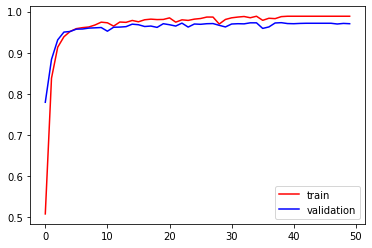

In [19]:
plt.plot(history.history['accuracy'],color = 'red', label = 'train')
plt.plot(history.history['val_accuracy'],color = 'blue', label = 'validation')
plt.legend()
plt.show()

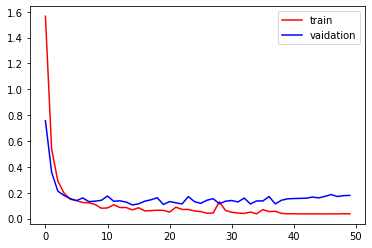

In [20]:
plt.plot(history.history['loss'],color = 'red',label = 'train')
plt.plot(history.history['val_loss'],color = 'blue',label = 'vaidation')
plt.legend()
plt.show()